In [149]:
import pandas as pd

df = pd.read_csv('full_export.csv')

df.head()

,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,truncated,...,from_user_utcoffset,from_user_timezone,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_withheld_scope,from_user_created_at
0,834362853406732291,1487762580,2017-02-22 11:23:00,ScienceEurope,Break out groups discussing training on #Resea...,low,0.0,NaN,NaN,0,...,3600.0,Amsterdam,en,499,1929,683,598,89,NaN,2014-02-17 15:00:02
1,834365870243737601,1487763299,2017-02-22 11:34:59,FWFOpenAccess,RT @StefEurope: N Föger discusses how her orga...,low,0.0,NaN,NaN,0,...,7200.0,Athens,de,6632,1945,533,539,131,NaN,2012-01-27 17:33:53
2,834371022539337728,1487764528,2017-02-22 11:55:28,FWF_at,RT @StefEurope: N Föger discusses how her orga...,low,0.0,NaN,NaN,0,...,3600.0,Belgrade,de,1971,865,295,440,35,NaN,2015-03-06 13:28:10
3,834371965951541249,1487764753,2017-02-22 11:59:13,didgoossens,RT @eMaud: Marc Schiltz Sec Gen @FnrLux openin...,low,0.0,NaN,NaN,0,...,3600.0,Vienna,en,1523,617,593,633,49,NaN,2009-08-05 08:47:58
4,834384433184636931,1487767725,2017-02-22 12:48:45,dolivauribe,Training in #ResearchIntegrity should be prior...,low,0.0,NaN,NaN,0,...,NaN,NaN,en,1472,212,81,270,53,NaN,2011-09-11 12:26:13


In [150]:
list(df)

['id',
 'time',
 'created_at',
 'from_user_name',
 'text',
 'filter_level',
 'possibly_sensitive',
 'withheld_copyright',
 'withheld_scope',
 'truncated',
 'retweet_count',
 'favorite_count',
 'lang',
 'to_user_name',
 'in_reply_to_status_id',
 'quoted_status_id',
 'source',
 'location',
 'lat',
 'lng',
 'from_user_id',
 'from_user_realname',
 'from_user_verified',
 'from_user_description',
 'from_user_url',
 'from_user_profile_image_url',
 'from_user_utcoffset',
 'from_user_timezone',
 'from_user_lang',
 'from_user_tweetcount',
 'from_user_followercount',
 'from_user_friendcount',
 'from_user_favourites_count',
 'from_user_listed',
 'from_user_withheld_scope',
 'from_user_created_at']

In [151]:
len(df) # Number of rows 

4000

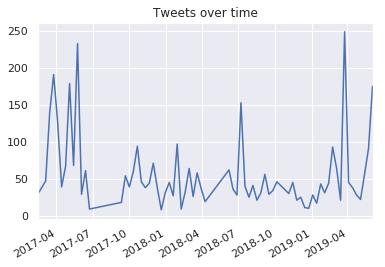

In [177]:
import seaborn as sns
sns.set()

df['created_at'] = pd.to_datetime(df['created_at'])

df['created_at'].dt.floor('10D').value_counts().sort_index().plot(kind='line', title='Tweets over time')

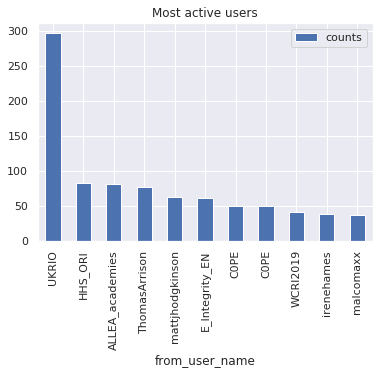

In [179]:
most_active = df.groupby('from_user_name').count().id.sort_values(ascending=False)[:10].index
active_df = df[df['from_user_name'].isin(most_active)]
active_df = active_df[['from_user_name', 'location']]
active_df['counts'] = active_df.groupby(['from_user_name'])['from_user_name'].transform('count')
active_df.drop_duplicates(inplace=True)
active_df.set_index('from_user_name', inplace=True)
active_df.sort_values(by='counts', ascending=False, inplace=True)
active_df.plot(kind='bar', title='Most active users')

In [180]:
active_df # Most active users locations

,location,counts
from_user_name,,
UKRIO,London CR0 0XT,297
HHS_ORI,"Rockville, MD",82
ALLEA_academies,Berlin,81
ThomasArrison,"Washington, DC",77
mattjhodgkinson,"Cambridge, UK",62
E_Integrity_EN,Worldwide,61
C0PE,11000 members worldwide,49
C0PE,"12,000 members worldwide",49
WCRI2019,Hong Kong,41


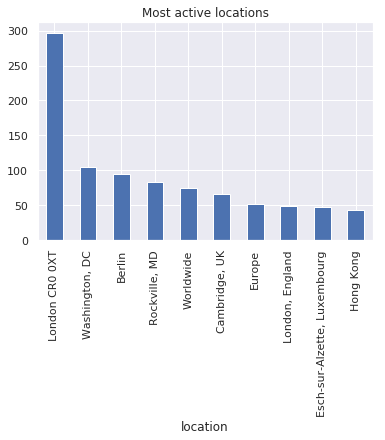

In [181]:
df.groupby('location').count()['id'].sort_values(ascending=False)[:10].plot(kind='bar', title='Most active locations')